## 1-6. 統合した結果をエクセルに保存してみよう！📊（練習問題）

今回はCSVファイルなどのテキストデータでの保存ですが、Pythonとエクセルの連携を行ってくれるライブラリは数多くあります。  
そういった事例をWebで探してきて、エクセルに直接書き出すツールを作ってみましょう。

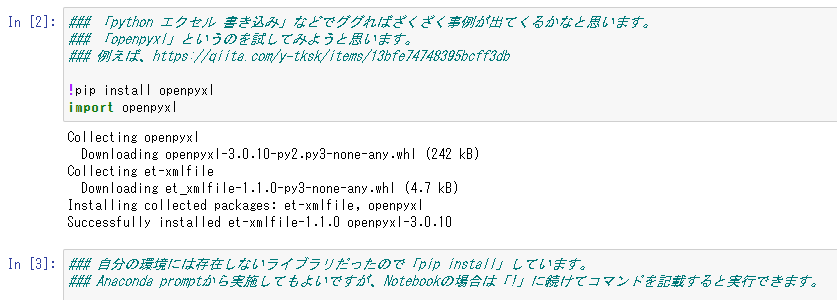

In [1]:
### 「python エクセル 書き込み」などでググればざくざく事例が出てくるかなと思います。
### 「openpyxl」というのを試してみようと思います。
### 例えば、https://qiita.com/y-tksk/items/13bfe74748395bcff3db

!pip install openpyxl
import openpyxl

# ちなみに…
使い慣れている人にとっては、pandasの「to_excel()」などが一番最初に思いつく、普通の方法な気がします。

https://note.nkmk.me/python-pandas-to-excel/

こちらのほうがずっと簡単なので、こういった簡単な方法で済ましてしまうのがベスト。

In [2]:
### ノートブックのおさらい　※ただ書き出すだけバージョン
import os, glob

paths = glob.glob("_data/01_01_inputs/*/*.csv")

def readcsv_line(path_of_csv):
    f = open(path_of_csv)
    head0 = f.readline()
    head1 = f.readline()
    data = []
    for n in range(24):
        tmp = f.readline()
        data.append(tmp)
    return head0, head1, data

for path in paths:
    head0,head1,data = readcsv_line(path)
    print("ファイル名：", path, "読み込んだファイルの型", type(data), "ヘッダ：", data[0:8], "文字数：", len(data))
    break

ファイル名： _data/01_01_inputs\2011.04.10送付\2011-04-01.csv 読み込んだファイルの型 <class 'list'> ヘッダ： ['0:0:0,0.5667528768388364,0.885809640025079,0.23108127799976852\n', '1:0:0,0.4932390911591263,0.9567389749679371,0.5386684883061955\n', '2:0:0,0.35467021139654986,1.0354313743986343,0.8277338204905564\n', '3:0:0,0.26976289590214175,1.007923664776447,0.922240641173904\n', '4:0:0,0.09808058980562656,0.9580387405915615,1.0439051190839432\n', '5:0:0,0.03381736686602456,0.8241040351611789,0.9128462315840578\n', '6:0:0,-0.04342119584338565,0.6038022765818803,0.7865458854564342\n', '7:0:0,-0.18507289348238365,0.35392837868035376,0.5168374604341802\n'] 文字数： 24


In [3]:
# 新規ブック
book = openpyxl.Workbook()
sheet = book.worksheets[0]

# 処理はここから
count = 1
for path in paths:
    head0,head1,data = readcsv_line(path)
    for cell_str in data:
        print(cell_str[:-1])
        sheet.cell(row=count, column=1).value = cell_str[:-1]
        count = count + 1
    #break

# 保存
book.save('練習問題1-6-0.xlsx')

# 終了
book.close()

0:0:0,0.5667528768388364,0.885809640025079,0.23108127799976852
1:0:0,0.4932390911591263,0.9567389749679371,0.5386684883061955
2:0:0,0.35467021139654986,1.0354313743986343,0.8277338204905564
3:0:0,0.26976289590214175,1.007923664776447,0.922240641173904
4:0:0,0.09808058980562656,0.9580387405915615,1.0439051190839432
5:0:0,0.03381736686602456,0.8241040351611789,0.9128462315840578
6:0:0,-0.04342119584338565,0.6038022765818803,0.7865458854564342
7:0:0,-0.18507289348238365,0.35392837868035376,0.5168374604341802
8:0:0,-0.3081775178437788,0.17026316590550938,0.215243630081176
9:0:0,-0.3993357916613355,-0.06222531798674147,-0.10736775444741103
10:0:0,-0.466179662153379,-0.39721240668958674,-0.4289024669312777
11:0:0,-0.6171251213535754,-0.5686836980428747,-0.6815168283635075
12:0:0,-0.7235820444908528,-0.7410038839991244,-0.9341923745565225
13:0:0,-0.7792177926837526,-0.8687752778907796,-0.9889469726949649
14:0:0,-0.8388152540488004,-0.9672593163798019,-0.9383590770019479
15:0:0,-0.931834049167

日付情報いれたりするのは、これまでの宿題のところでも対応できるかなと思います。
カンマ区切りしたいところですが、これはノートブック2で出てくる文字列の「split」などをうまく使えば可能かなと思います。